#                            Airbnb Berlin Exploratory Data Analysis

## Breakdown of this notebook:

1. **Importing Libraries**
2. **Loading the datasets**
3. **Data pre-processing**
4. **Data Analysis**:
     * Listing types
     * Neighborhoods|
     * Ownership
     * Prices
     * Trends and Seasonality 
6. **Conclusions**

# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from langdetect import detect
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# **2. Loading Dataset**

#### Link to download the original dataset [here](https://insideairbnb.com/get-the-data/)

In [2]:
listings_df = pd.read_csv(r"C:\Users\user\Desktop\Airbnb\Listings.csv", encoding = "UTF-8",sep = ';')

listings_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.4181,Entire home/apt,95.0,63.0,148,25.05.2023,0.78,1.0,293.0
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.41805,Entire home/apt,180.0,6.0,7,04.01.2020,0.06,1.0,43.0
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.548130,13.40366,Entire home/apt,75.0,150.0,26,30.11.2023,0.15,4.0,91.0
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.503120,13.43508,Entire home/apt,90.0,93.0,48,14.12.2017,0.27,2.0,111.0
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.494190,13.42166,Entire home/apt,28.0,92.0,299,01.12.2022,1.65,1.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,1.31E+18,Trung tâm quận Wedding,667407129,Lisa,Mitte,Wedding Zentrum,52.550847,13.3616519,Entire home/apt,80.0,1.0,0,NaN,NaN,2.0,352.0
13949,1.31E+18,Wunderschönes Zimmer im Zentrum,650206258,Gihad,Mitte,Regierungsviertel,52.515988,13.3803309,Private room,760.0,1.0,0,NaN,NaN,2.0,365.0
13950,1.32E+18,Modernes Apartment im Neuköllner Kiez,119577461,Mikel,Neukölln,Neuköllner Mitte/Zentrum,52.464220,13.43761,Entire home/apt,119.0,1.0,0,NaN,NaN,11.0,89.0
13951,1.32E+18,1 Room Loft Studio Apartment,46882657,Teresa,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.514735,13.45934084,Entire home/apt,52.0,92.0,0,NaN,NaN,1.0,365.0


# **3. Data pre-processing**

In [3]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13953 non-null  object 
 1   name                            13953 non-null  object 
 2   host_id                         13943 non-null  object 
 3   host_name                       13934 non-null  object 
 4   neighbourhood_group             13943 non-null  object 
 5   neighbourhood                   13943 non-null  object 
 6   latitude                        13943 non-null  float64
 7   longitude                       13943 non-null  object 
 8   room_type                       13943 non-null  object 
 9   price                           8962 non-null   float64
 10  minimum_nights                  13943 non-null  float64
 11  number_of_reviews               13943 non-null  object 
 12  last_review                     

In [4]:
listings_df.describe()

,latitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,13943.000000,8962.000000,13943.000000,10674.000000,13943.000000,13943.000000
mean,52.506037,137.738786,41.574195,1.224683,11.972603,139.024026
std,0.333095,338.980283,53.873059,1.886292,47.973433,139.071531
min,13.381580,10.000000,1.000000,0.010000,1.000000,0.000000
25%,52.489601,69.000000,2.000000,0.130000,1.000000,0.000000
50%,52.509010,97.000000,5.000000,0.540000,1.000000,89.000000
75%,52.531844,149.000000,92.000000,1.720000,3.000000,269.000000
max,52.659887,9999.000000,1125.000000,50.930000,318.000000,365.000000


In [5]:
listings_df.isnull().sum()

id                                   0
name                                 0
host_id                             10
host_name                           19
neighbourhood_group                 10
neighbourhood                       10
latitude                            10
longitude                           10
room_type                           10
price                             4991
minimum_nights                      10
number_of_reviews                   10
last_review                       3279
reviews_per_month                 3279
calculated_host_listings_count      10
availability_365                    10
dtype: int64

#### *Too many missing values (price, last_review, reviews_per_month)*

In [6]:
listings_df['price'] = listings_df['price'].fillna(listings_df['price'].mean())

listings_df['reviews_per_month'] = listings_df['reviews_per_month'].fillna(0)

listings_df.drop(axis = 1, columns = ['last_review'], inplace = True)

#### Price:
##### *To fill missing price-values to average value;*
#### Reviews by months:
##### *To replace with 0;*
#### Last reviews:
##### *Delete, they are no so important for analysis;*

In [7]:
listings_df.isnull().sum()

id                                 0
name                               0
host_id                           10
host_name                         19
neighbourhood_group               10
neighbourhood                     10
latitude                          10
longitude                         10
room_type                         10
price                              0
minimum_nights                    10
number_of_reviews                 10
reviews_per_month                  0
calculated_host_listings_count    10
availability_365                  10
dtype: int64

In [8]:
listings_df = listings_df.dropna()

In [9]:
listings_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Any other rows with *Nan* values don't make some difference

In [10]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6.0,7,0.06,1.0,43.0
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,75.0,150.0,26,0.15,4.0,91.0
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93.0,48,0.27,2.0,111.0
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,28.0,92.0,299,1.65,1.0,29.0


# **4. Data Analysis**

#### We will uncover insights on:

##### 1. Listings types: Company 'Airbnb' offers a room or a shared room within one's home. Is it so?
##### 2. Neighborhoods: Are listings evenly spread across neighborhoods or are there hotspots?
##### 3. Ownership: are properties owned by individual users or are there users with multiple rental properties (i.e. potentially for speculation)?
##### 4. Prices: What does mostly the price depend on?
##### 5. Trends and Seasonality: Is the flow of tourists seasonal, that is does it follow a seasonal trend? Can we explain the pattern?

### *4.1 Listings types*

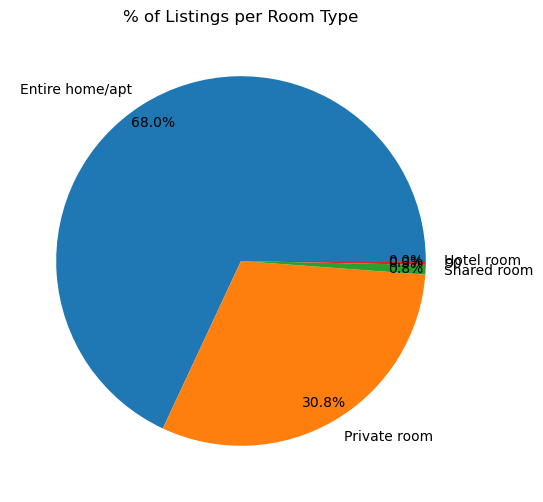

In [12]:
fig, ax = plt.subplots(figsize = (6,6))

pie_data = listings_df['room_type'].value_counts()

pie_names = listings_df['room_type'].unique()

ax.pie(pie_data, labels = pie_names, autopct = '%.1f%%',pctdistance=0.89)
ax.set_title('% of Listings per Room Type');

'Airbnb' was created to share rooms, but **68% of the listings in Berlin are actually about entire homes or apartments**. Private rooms only take around 31%.

In [13]:
listings_df['room_type'].value_counts()

room_type
Entire home/apt    9482
Private room       4288
Hotel room          117
Shared room          46
90                    1
Name: count, dtype: int64

In [14]:
listings_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', '90',
       'Hotel room'], dtype=object)

### *4.2 Neighborhoods*

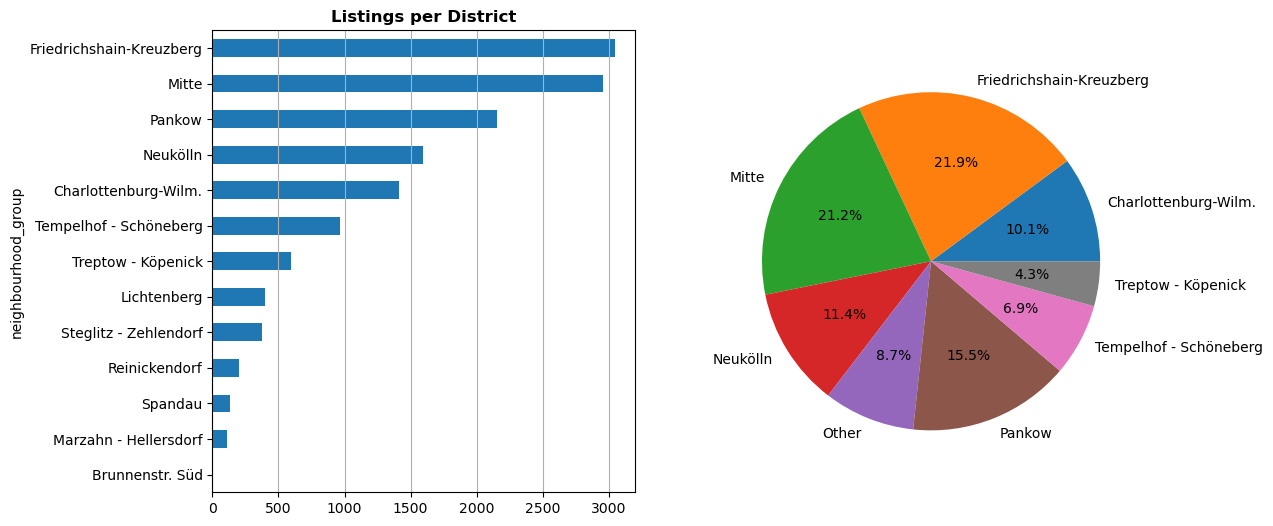

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))

n_listings = listings_df['neighbourhood_group'].value_counts(ascending = True)
n_listings.plot(kind = 'barh', ax = ax1)

ax1.grid(axis = 'x')
ax1.set_title('Listings per District', weight = 'bold')

small_values = n_listings.iloc[:6].index
n_listings_renamed = n_listings.rename(index = {v : 'Other' for v in small_values})
pie_data = n_listings_renamed.groupby(n_listings_renamed.index).sum()

ax2.pie(pie_data, labels = pie_data.index, autopct='%.1f%%');

Friedrichshain-Kreuzberg and Mitte, both of them located in the center of Berlin, have **more than 43%** of total listings

**Are these places apartments or rooms?**

In [16]:
listings_df.groupby(['neighbourhood_group', 'room_type']).size().value_counts

<bound method IndexOpsMixin.value_counts of neighbourhood_group       room_type      
Brunnenstr. Süd           90                    1
Charlottenburg-Wilm.      Entire home/apt     953
                          Hotel room           21
                          Private room        435
Friedrichshain-Kreuzberg  Entire home/apt    1986
                          Hotel room            5
                          Private room       1035
                          Shared room          21
Lichtenberg               Entire home/apt     245
                          Hotel room            8
                          Private room        142
Marzahn - Hellersdorf     Entire home/apt      66
                          Private room         43
Mitte                     Entire home/apt    2131
                          Hotel room           42
                          Private room        765
                          Shared room          15
Neukölln                  Entire home/apt     954
              

In [17]:
listings_df['neighbourhood_group'].value_counts()

neighbourhood_group
Friedrichshain-Kreuzberg    3047
Mitte                       2953
Pankow                      2156
Neukölln                    1591
Charlottenburg-Wilm.        1409
Tempelhof - Schöneberg       966
Treptow - Köpenick           597
Lichtenberg                  395
Steglitz - Zehlendorf        377
Reinickendorf                198
Spandau                      135
Marzahn - Hellersdorf        109
Brunnenstr. Süd                1
Name: count, dtype: int64

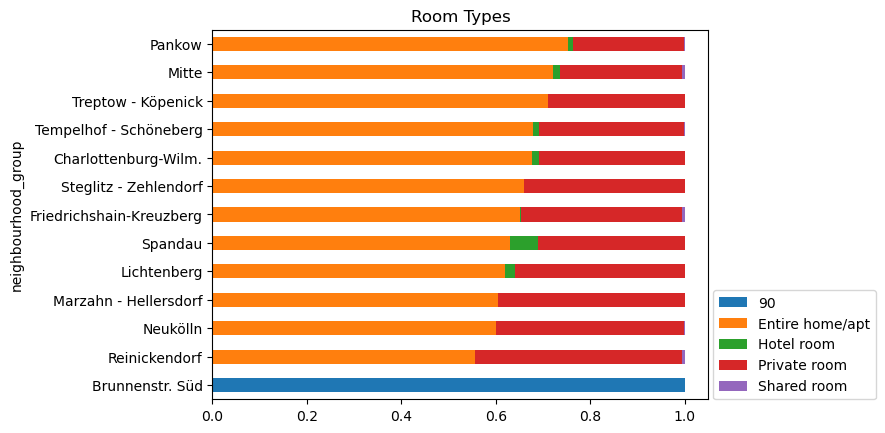

In [18]:
fig, ax = plt.subplots()

barh_data = listings_df.groupby(['neighbourhood_group', 'room_type']).size().unstack('room_type').fillna(0).apply(lambda x: x/x.sum(), axis = 1).sort_values('Entire home/apt')
barh_data.plot(kind = 'barh',stacked = True, ax = ax)

ax.set_title('Room Types')
ax.legend(loc=(1.01, 0))

plt.show()

In [19]:
listing_500 = listings_df[listings_df['price']<500]

In [20]:
listing_500['longitude'] = pd.to_numeric(listing_500['longitude'], errors='coerce')
listing_500['latitude'] = pd.to_numeric(listing_500['latitude'], errors='coerce')

listing_500.dropna(subset=['longitude', 'latitude'], inplace=True)

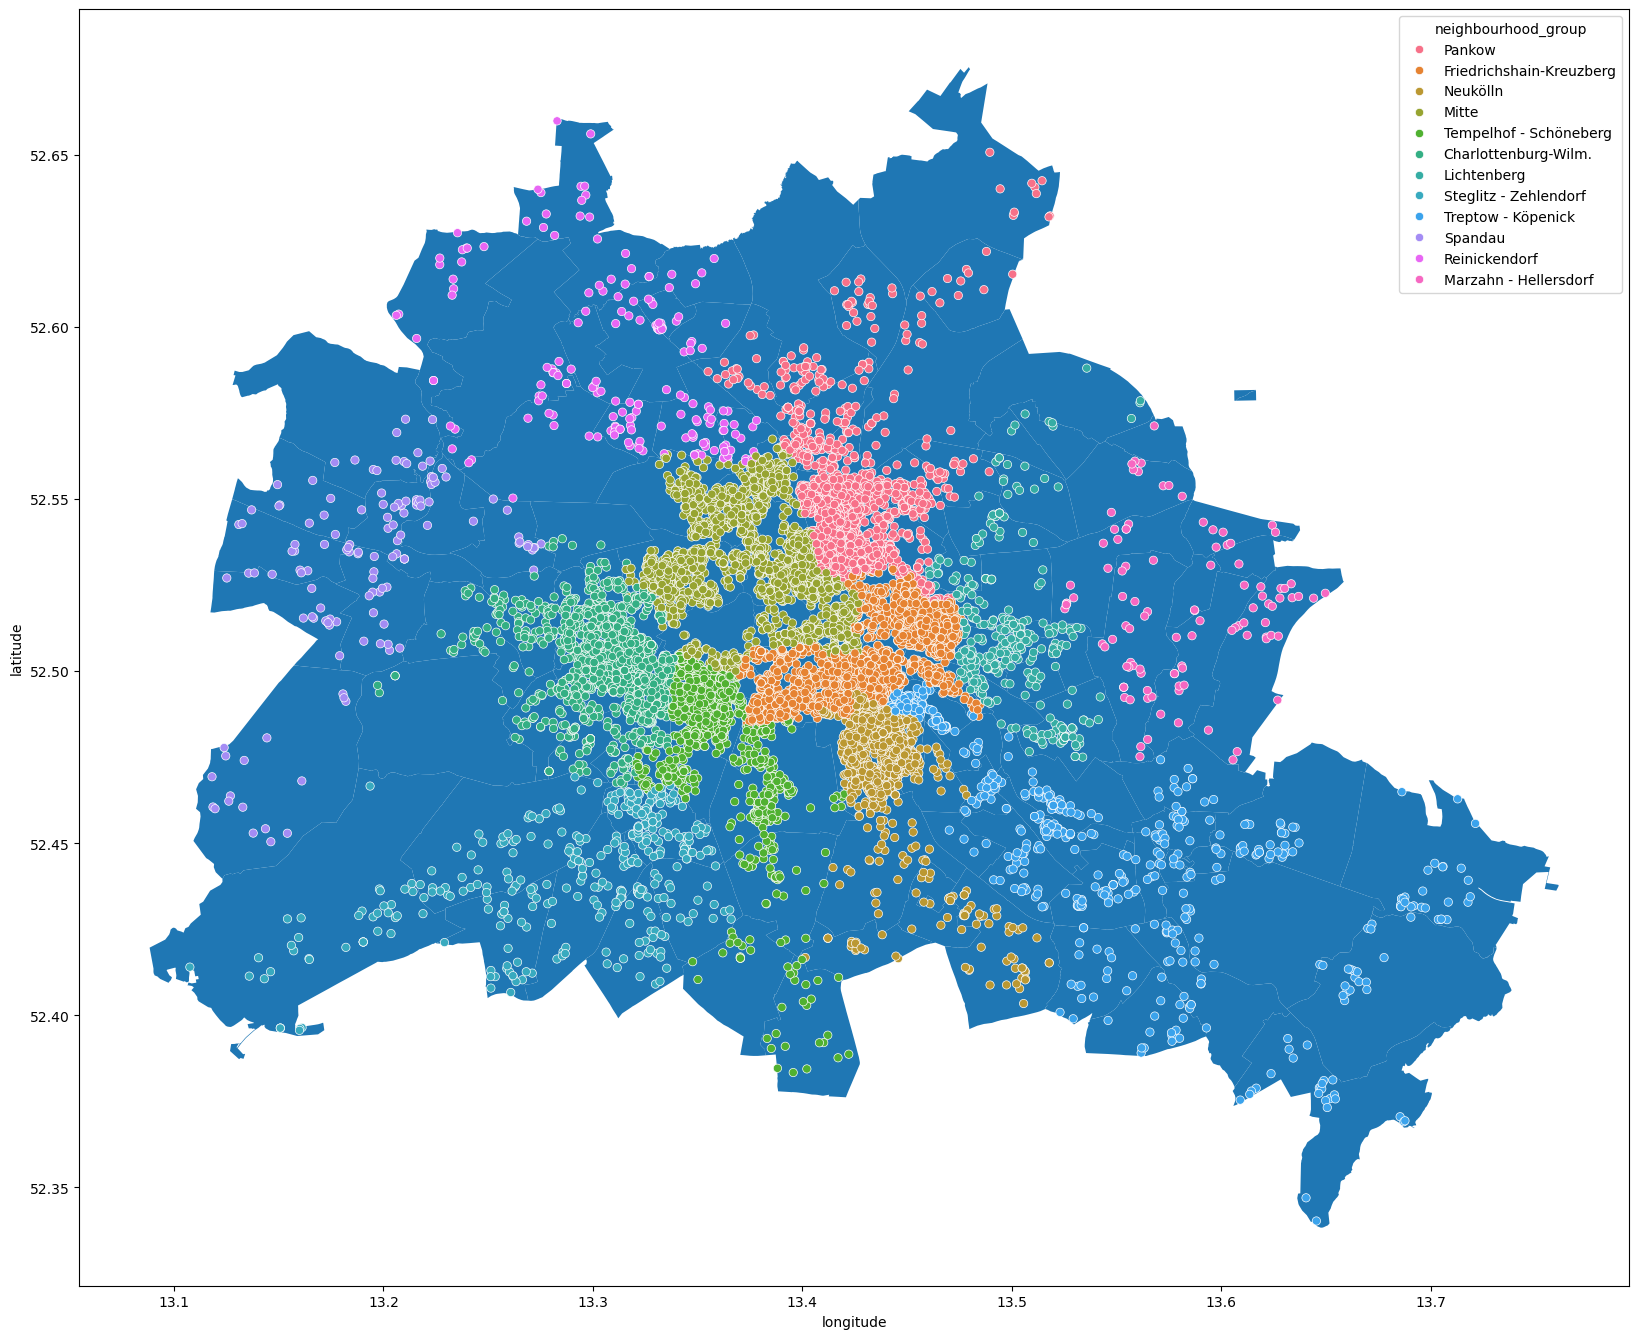

In [21]:
berlin = gpd.read_file(r"C:\Users\user\Desktop\Airbnb\neighbourhoods.geojson")

berlin.plot(figsize = (20,20))

sns.scatterplot(x = listing_500['longitude'], y = listing_500['latitude'], hue = listing_500['neighbourhood_group'])
plt.show()

That's true. **Most of the listings are located in the center of Berlin**

### *4.3 Ownerships*

In [22]:
listings_df['host_id'] = pd.to_numeric(listings_df['host_id'], errors='coerce')
Users_id = listings_df.groupby('host_id').size()

In [23]:
Users_id

host_id
1581.0         3
2217.0         5
3718.0         1
8890.0         1
10966.0        2
              ..
666509818.0    1
666764397.0    1
666781571.0    1
667333552.0    1
667407129.0    2
Length: 9716, dtype: int64

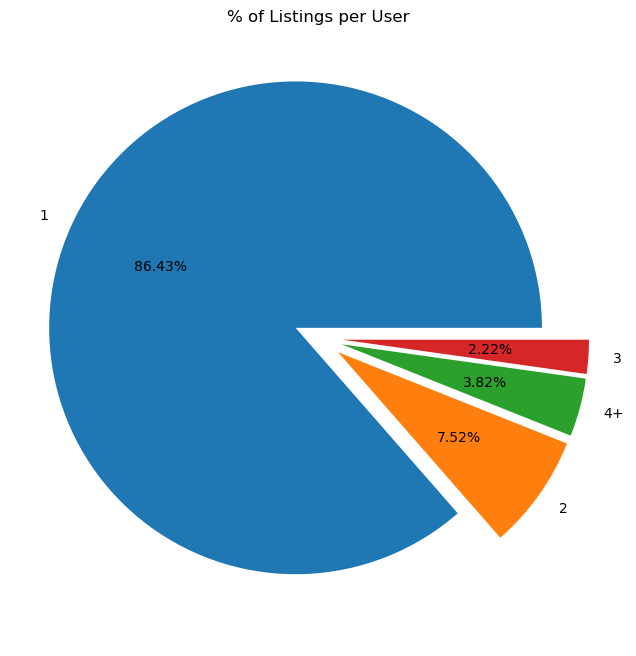

In [24]:
fig, ax = plt.subplots(figsize = (8,8))

pie_data = pd.cut(Users_id, bins = [0,1,2,3,1000], labels = ['1','2','3','4+']).value_counts()

ax.pie(pie_data, labels = pie_data.index, autopct='%1.2f%%', explode = (0.1, ) * len(pie_data))

ax.set_title('% of Listings per User');

More than **13%** of the users have **more than one listing**


In [25]:
Users_id.sort_values(ascending = False).head(10)

host_id
434485440.0    318
418270816.0     72
529388435.0     71
449692327.0     58
8912086.0       49
335573202.0     48
546288100.0     44
210700814.0     44
271235180.0     40
376961462.0     35
dtype: int64

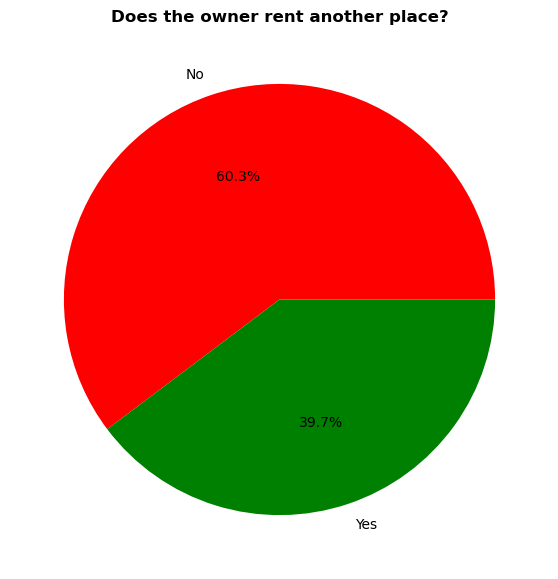

In [26]:
fig, ax = plt.subplots(figsize = (7,7))

pie_data = (listings_df['host_id'].map(listings_df.groupby('host_id').size() > 1).value_counts())

ax.pie(pie_data, labels = ['No', 'Yes'], autopct='%1.1f%%', colors = ['red', 'green']);

ax.set_title("Does the owner rent another place?", weight = 'bold');

As we see, almost **40%** of the properties, that you can see on the website, **are owned by the users which have already another property.**

### *4.4 Prices*

We will only looking at data, that has prices **less than 500 per night**

In [27]:
listings_df['price']

0         95.0
1        180.0
2         75.0
3         90.0
4         28.0
         ...  
13948     80.0
13949    760.0
13950    119.0
13951     52.0
13952    103.0
Name: price, Length: 13934, dtype: float64

In [28]:
Price_500 = listings_df[listings_df['price']<500]

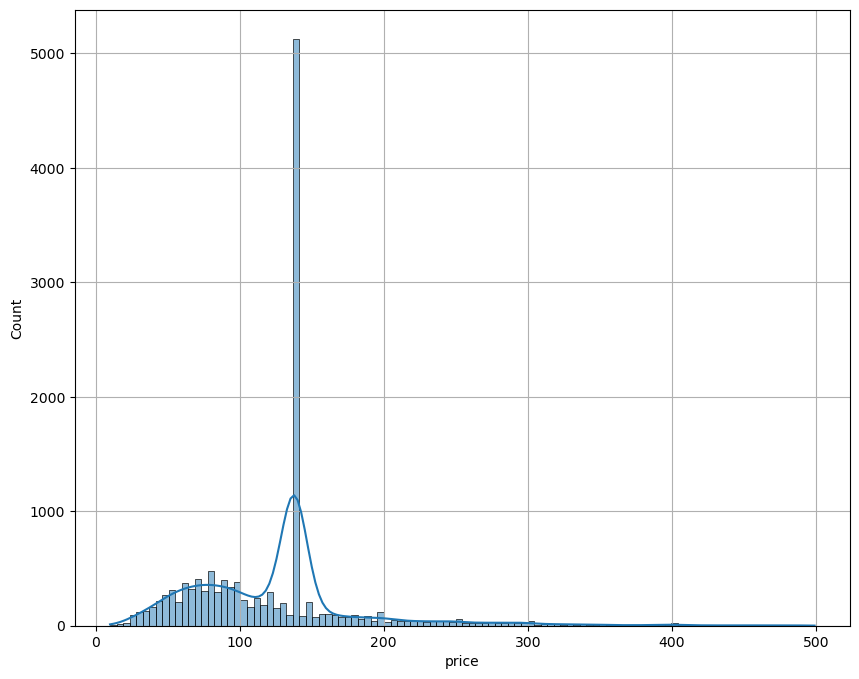

In [29]:
plt.figure(figsize = (10,8))
sns.histplot(Price_500['price'], kde = True)
plt.grid('x')
plt.show()

That's interesting, more than **5000 properties need ≈140$ per night**. Let's see if price has different distribution depending on the language.

In [30]:
listings_df['name']

0                      Fabulous Flat in great Location
1                  Geourgeous flat - outstanding views
2                  Studio Apartment in Prenzlauer Berg
3                   In the Heart of Berlin - Kreuzberg
4        Beautiful Kreuzberg studio - 3 months minimum
                             ...                      
13948                           Trung tâm quận Wedding
13949                  Wunderschönes Zimmer im Zentrum
13950            Modernes Apartment im Neuköllner Kiez
13951                     1 Room Loft Studio Apartment
13952          Cozy 4-Room Apartment in Central Berlin
Name: name, Length: 13934, dtype: object

In [31]:
def textdetect(text):
    try:
        return detect(text)
    except:
        return np.nan

In [32]:
trans_prices = np.log1p(listings_df['price'])
listings_df['name_lang'] = listings_df['name'].apply(textdetect)

C:\Users\user\AppData\Local\Temp\ipykernel_20712\2441179444.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



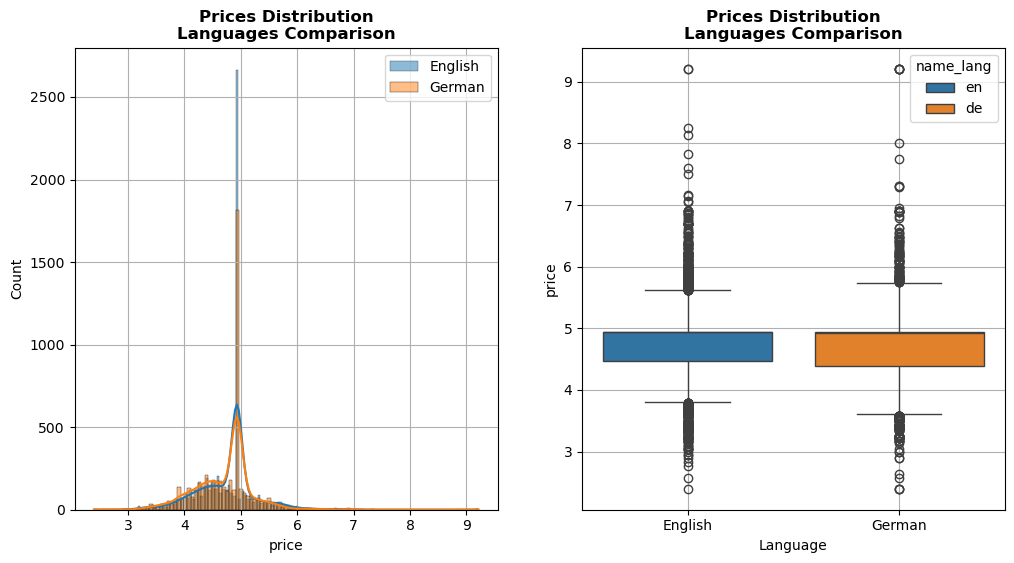

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
sns.histplot(trans_prices[listings_df['name_lang'] == 'en'], ax = ax1, label = 'English', kde = True)
sns.histplot(trans_prices[listings_df['name_lang'] == 'de'], ax = ax1, label = 'German', kde = True)

ax1.set_title('Prices Distribution\nLanguages Comparison', weight = 'bold')
ax1.legend()
ax1.grid()

sns.boxplot(data = listings_df[listings_df['name_lang'].isin(['de', 'en'])], x = 'name_lang', y = trans_prices, ax = ax2, hue = 'name_lang')

ax2.set_title('Prices Distribution\nLanguages Comparison', weight='bold')
ax2.set_xlabel('Language')
ax2.set_xticklabels(['English', 'German'])
ax2.grid()


plt.show()

The distribution for listings with English titles and listings with German titles is **practically identical.**


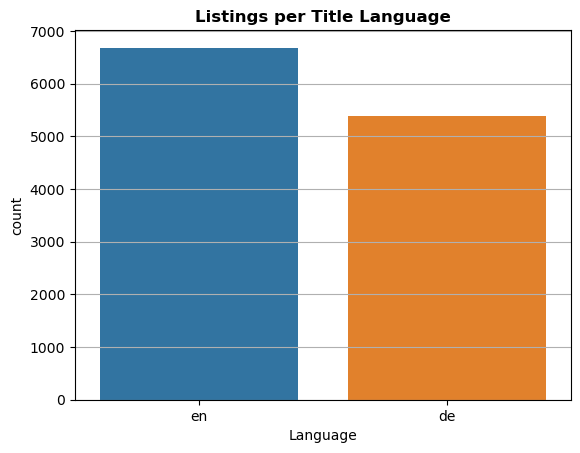

In [34]:
sns.countplot(data = listings_df[listings_df['name_lang'].isin(['de', 'en'])], x = 'name_lang', hue = 'name_lang')
plt.xlabel('Language')
plt.title('Listings per Title Language', weight = 'bold')
plt.grid(axis = 'y')

As we can see, mostly offers focused on **English**

### *4.5 Trends and Seasonality*

In [35]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_lang'],
      dtype='object')

In [36]:
review_df = pd.read_csv(r"C:\Users\user\Desktop\Airbnb\Review.csv", sep = ';')

In [37]:
review_df.head()

,listing_id,date
0,3176.0,20.06.2009
1,3176.0,07.11.2010
2,3176.0,24.11.2010
3,3176.0,21.12.2010
4,3176.0,04.01.2011


In [38]:
review_df.rename(columns = {'listing_id':'id'}, inplace=True)

In [39]:
review_df['id'].dtype

dtype('float64')

In [40]:
listings_df['id'].dtype

dtype('O')

In [41]:
listings_df['id'] = pd.to_numeric(listings_df['id'], errors='coerce')
listings_df['id'].dropna()

0        3.176000e+03
1        9.991000e+03
2        1.432500e+04
3        1.664400e+04
4        1.790400e+04
             ...     
13948    1.310000e+18
13949    1.310000e+18
13950    1.320000e+18
13951    1.320000e+18
13952    1.320000e+18
Name: id, Length: 13933, dtype: float64

In [42]:
merge_df = review_df.merge(listings_df, on = 'id')

In [43]:
merge_df.head()

,id,date,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_lang
0,3176.0,20.06.2009,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en
1,3176.0,07.11.2010,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en
2,3176.0,24.11.2010,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en
3,3176.0,21.12.2010,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en
4,3176.0,04.01.2011,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en


In [44]:
merge_df['date'] = pd.to_datetime(merge_df['date'])

C:\Users\user\AppData\Local\Temp\ipykernel_20712\4215464744.py:1: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [45]:
date_df = merge_df.groupby('date').size()

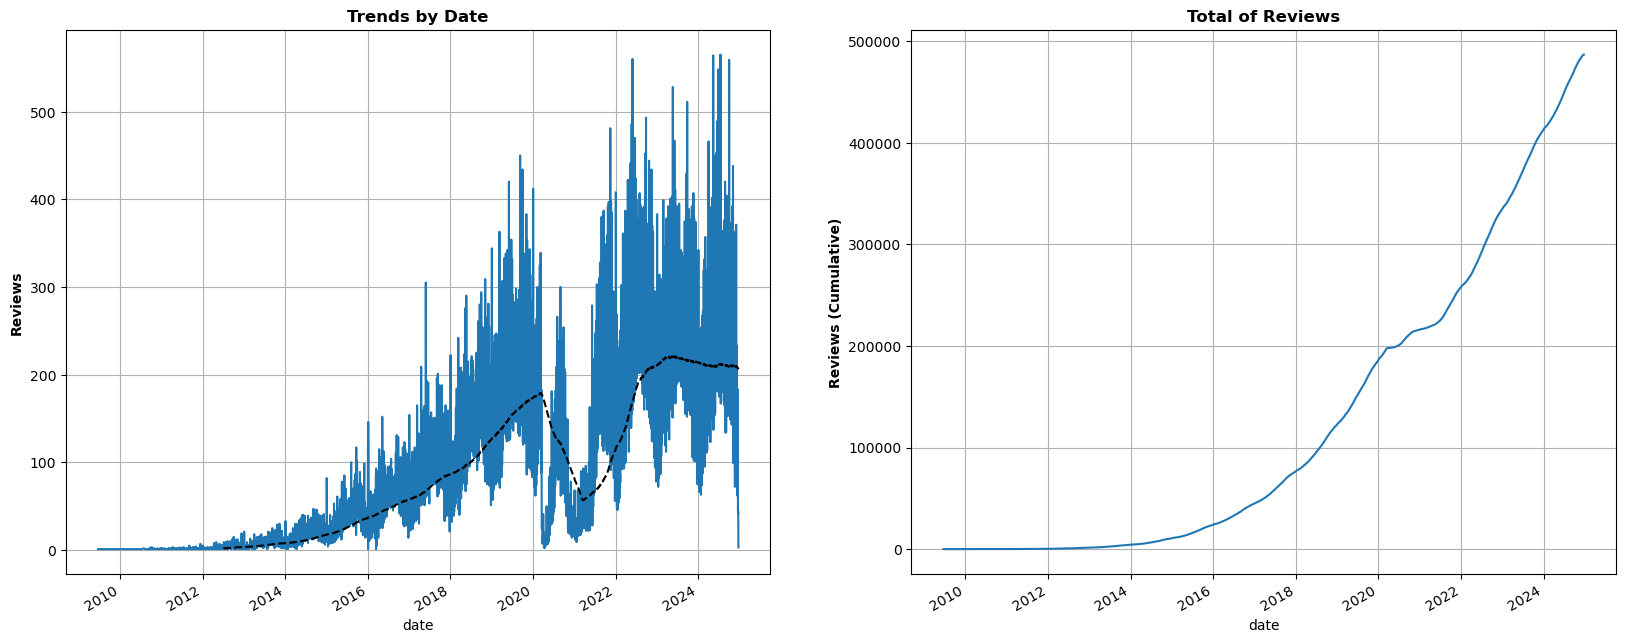

In [46]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,8))

date_df.plot(ax = ax1)
date_df.rolling(365).mean().plot(ax=ax1, c = 'k', ls = '--')

ax1.set_title('Trends by Date', weight = 'bold')
ax1.set_ylabel('Reviews', weight = 'bold')
ax1.grid()

date_df.cumsum().plot(ax = ax2)
ax2.set_title('Total of Reviews', weight = 'bold')
ax2.set_ylabel('Reviews (Cumulative)', weight = 'bold')
ax2.grid()

1. The reviews have been **increasing over the years**.
2. Because of Corona, **between 2020 and 2022** reviews **were decreasing**.
3. Also, we can see, that there is enough **strong seasonality**.

In [47]:
bar_data_years = merge_df.groupby(merge_df['date'].dt.year).size()
bar_data_months = merge_df.groupby(merge_df['date'].dt.month).size()

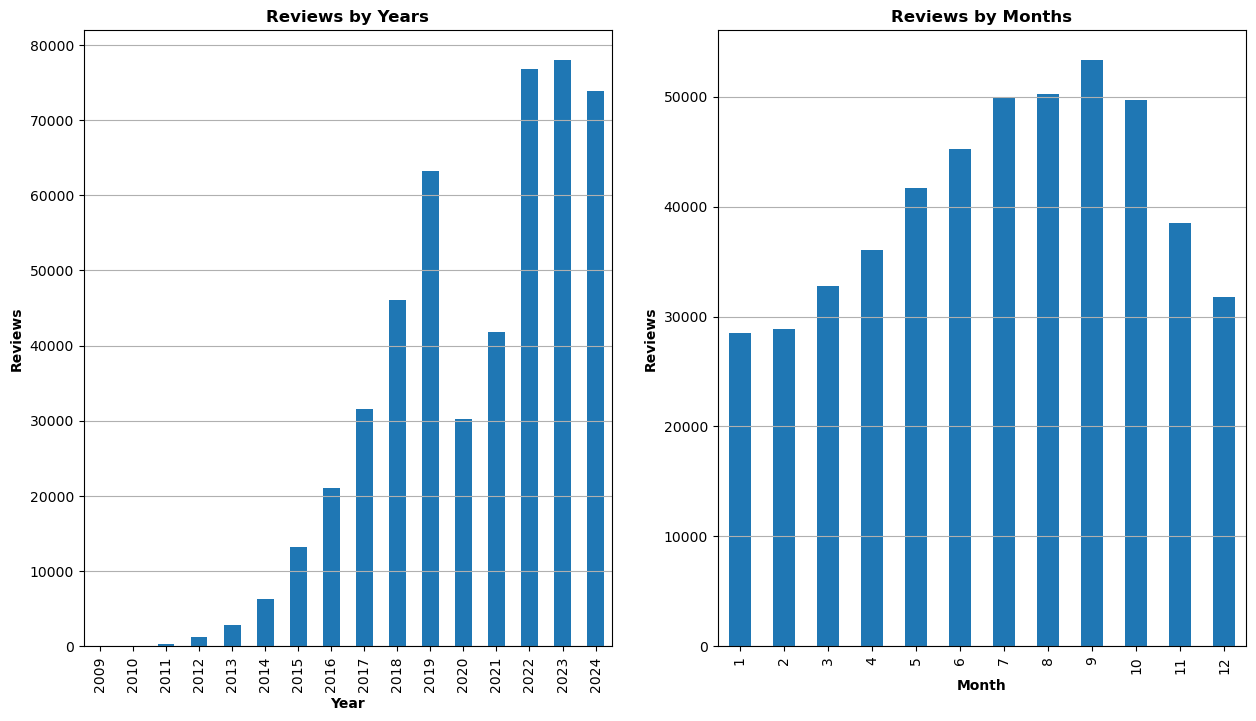

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,8))

bar_data_years.plot(ax = ax1, kind = 'bar')
ax1.set_title('Reviews by Years', weight = 'bold')
ax1.set_xlabel('Year', weight = 'bold')
ax1.set_ylabel('Reviews', weight = 'bold')
ax1.grid(axis = 'y')

bar_data_months.plot(ax = ax2, kind = 'bar')
ax2.set_title('Reviews by Months', weight = 'bold')
ax2.set_xlabel('Month', weight = 'bold')
ax2.set_ylabel('Reviews', weight = 'bold')
ax2.grid(axis = 'y')

In [49]:
merge_df['year'] = merge_df['date'].dt.year
merge_df['month'] = merge_df['date'].dt.month

In [50]:
data_m_y = merge_df.groupby(['month', 'year']).size().unstack()

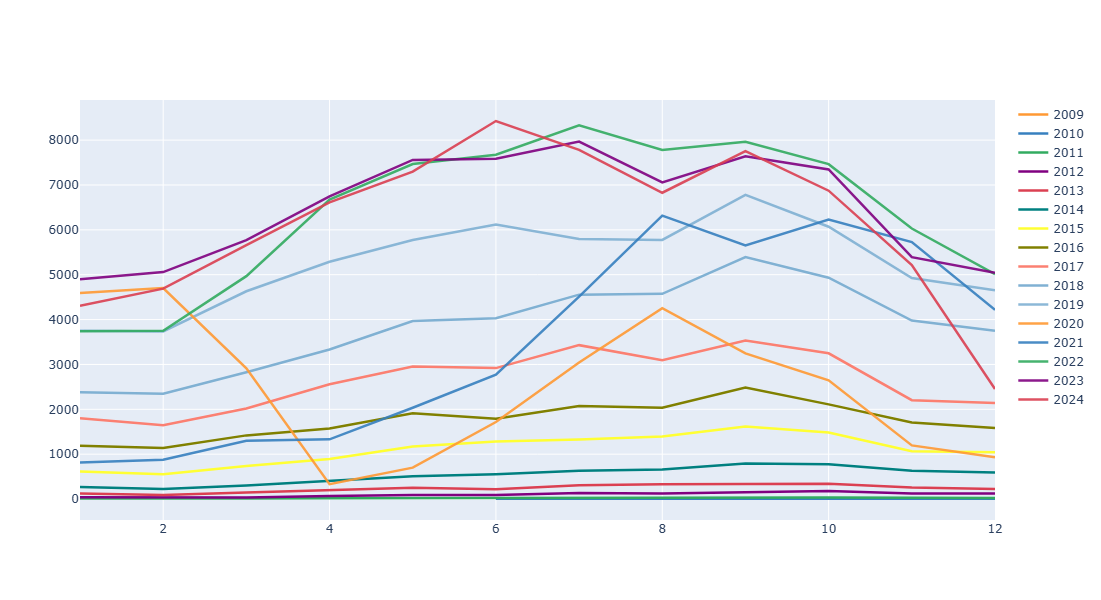

In [51]:
data_m_y.iplot(title = 'Reviews by Years and Months', xTitle = 'Month', yTitle = 'Reviews', width = 2.5, layout=dict(width = 1100, height = 600))

In [52]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_lang'],
      dtype='object')

In [53]:
merge_df.head()

,id,date,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_lang,year,month
0,3176.0,2009-06-20,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en,2009,6
1,3176.0,2010-11-07,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en,2010,11
2,3176.0,2010-11-24,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en,2010,11
3,3176.0,2010-12-21,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en,2010,12
4,3176.0,2011-01-04,Fabulous Flat in great Location,3718.0,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,95.0,63.0,148,0.78,1.0,293.0,en,2011,1


In [54]:
merge_df.shape

(486660, 19)

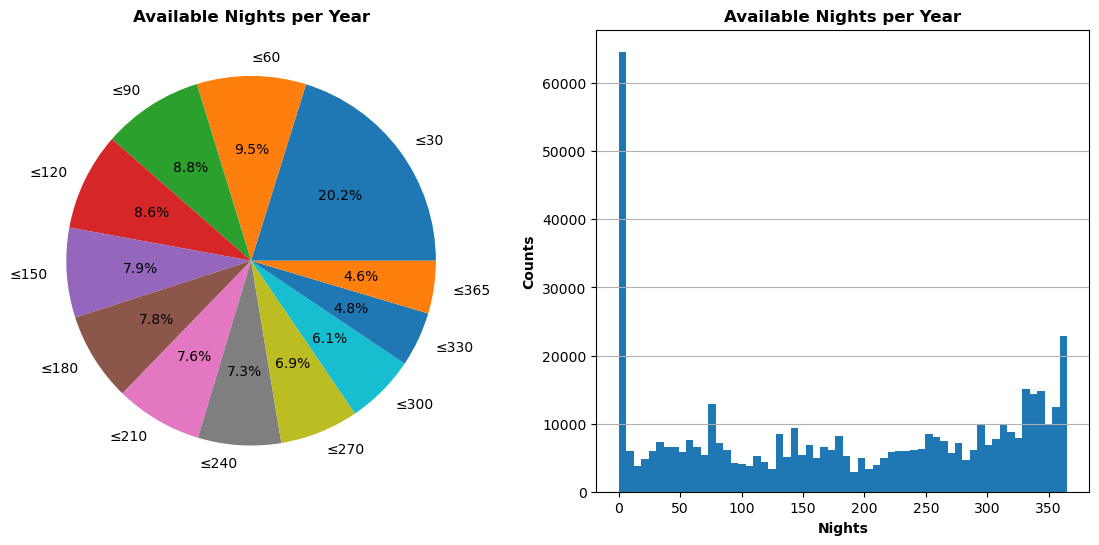

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (14,6))

Availability = merge_df['availability_365']
pie_data = pd.cut(Availability, bins=[0,30,60,90,120,150,180,210,240,270,300,330,366]).value_counts() 
ax1.pie(pie_data, labels=['≤30', '≤60', '≤90','≤120', '≤150', '≤180', '≤210', '≤240', '≤270', '≤300', '≤330', '≤365'], autopct='%1.1f%%');

ax1.set_title('Available Nights per Year', weight = 'bold')

ax2.hist(Availability, bins = 60)
ax2.set_title('Available Nights per Year', weight = 'bold')
ax2.set_xlabel('Nights', weight = 'bold')
ax2.set_ylabel('Counts', weight = 'bold')
ax2.grid(axis = 'y');

In [60]:
merge_df.select_dtypes(include = ['float64'])

,id,host_id,latitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
0,3.176000e+03,3718.0,52.534710,95.000000,63.0,0.78,1.0,293.0
1,3.176000e+03,3718.0,52.534710,95.000000,63.0,0.78,1.0,293.0
2,3.176000e+03,3718.0,52.534710,95.000000,63.0,0.78,1.0,293.0
3,3.176000e+03,3718.0,52.534710,95.000000,63.0,0.78,1.0,293.0
4,3.176000e+03,3718.0,52.534710,95.000000,63.0,0.78,1.0,293.0
...,...,...,...,...,...,...,...,...
486655,1.260000e+18,12115180.0,52.509249,123.000000,3.0,0.00,2.0,139.0
486656,1.260000e+18,500861010.0,52.571920,137.738786,28.0,0.00,7.0,317.0
486657,1.260000e+18,500861010.0,52.571920,137.738786,28.0,0.91,7.0,355.0
486658,1.260000e+18,656551681.0,52.539430,56.000000,2.0,1.88,3.0,87.0


In [62]:
Reviews_price = merge_df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count','availability_365']]

In [63]:
Reviews_price.corr()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.017817,-0.086268,0.152587,0.056678
minimum_nights,-0.017817,1.000000,-0.121911,-0.091285,-0.108639
reviews_per_month,-0.086268,-0.121911,1.000000,0.050012,0.250475
calculated_host_listings_count,0.152587,-0.091285,0.050012,1.000000,0.256136
availability_365,0.056678,-0.108639,0.250475,0.256136,1.000000


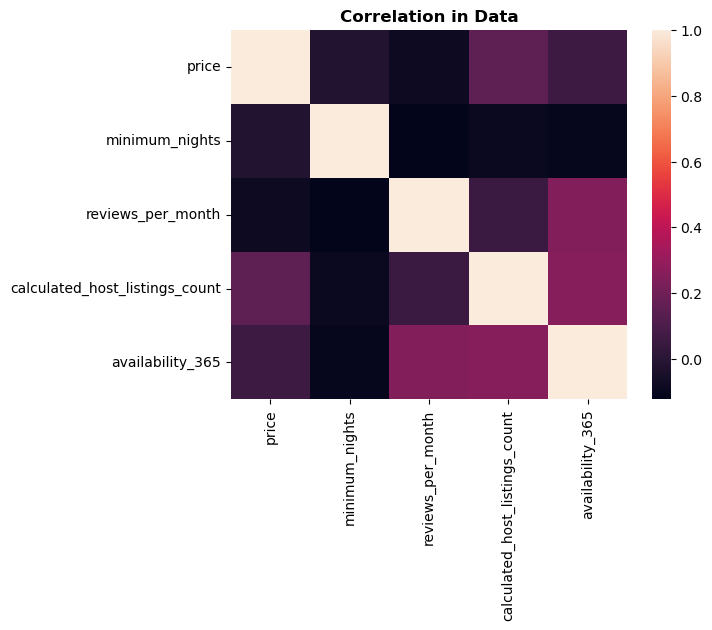

In [66]:
sns.heatmap(Reviews_price.corr())
plt.title('Correlation in Data', weight = 'bold')
plt.show()

## 5.Conclusion

#### 1. The most popular listings in Berlin are for entire apartments or homes which make around **68%** of the listings. For single rooms only **30%**.
#### 2. High concentration of accommodations in the center, which should be normal for every city.
#### 3. Speculation is not a problem, as only **40%** of the hosts that own an entire property actually have at least another flat listed.#### 4. No price difference between listings with English and German titles, but most of titles was written **on English**.
#### 5. Number of reviews (and therefore, number of bookings) increasing every year until Corona. The pandemic situation makes it difficult for numbers to stabilize.
